# 1. Eigenfices

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [41]:
dataset = datasets.fetch_lfw_people()
X = dataset['data']
n_features = X.shape[1]
n = X.shape[0]
n_samples, h, w = dataset.images.shape

1. (a)

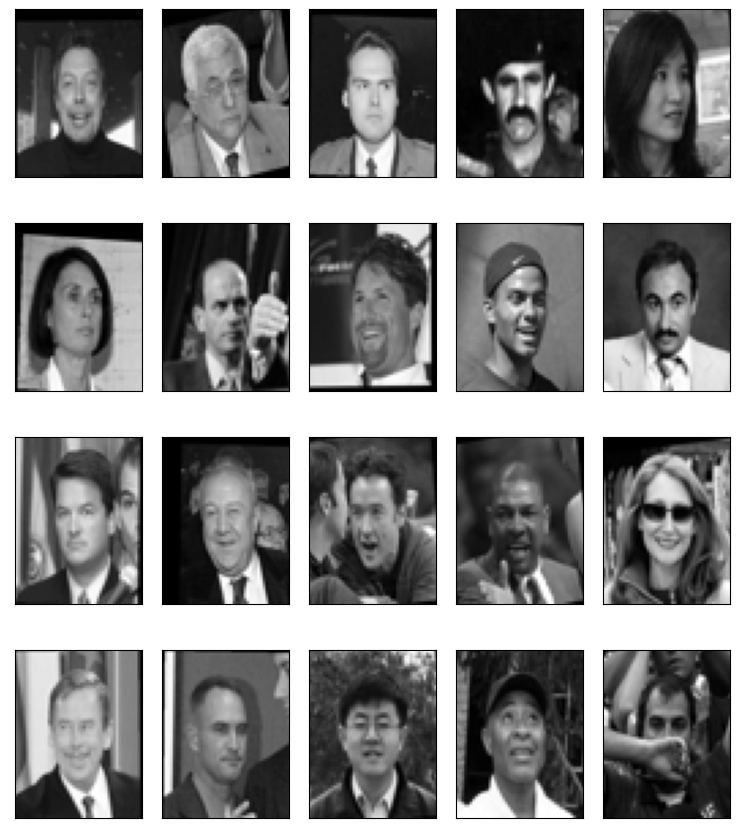

In [22]:
def plot_faces(images, n_row, n_col):
    plt.figure(figsize=(1.5 * n_col, 2.2 * n_row))
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()
    
plot_faces(X[:20], n_row = 4, n_col = 5)

1(b)

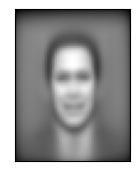

In [4]:
Xmean = np.mean(X,axis=0).reshape(1,n_features) # average face
#plot the average face from the dataset
plot_faces(Xmean, n_row = 1, n_col = 1)

1(c)

In [15]:
# SVD decomposition
U, SIGMA, V = np.linalg.svd(X)
V = V.T

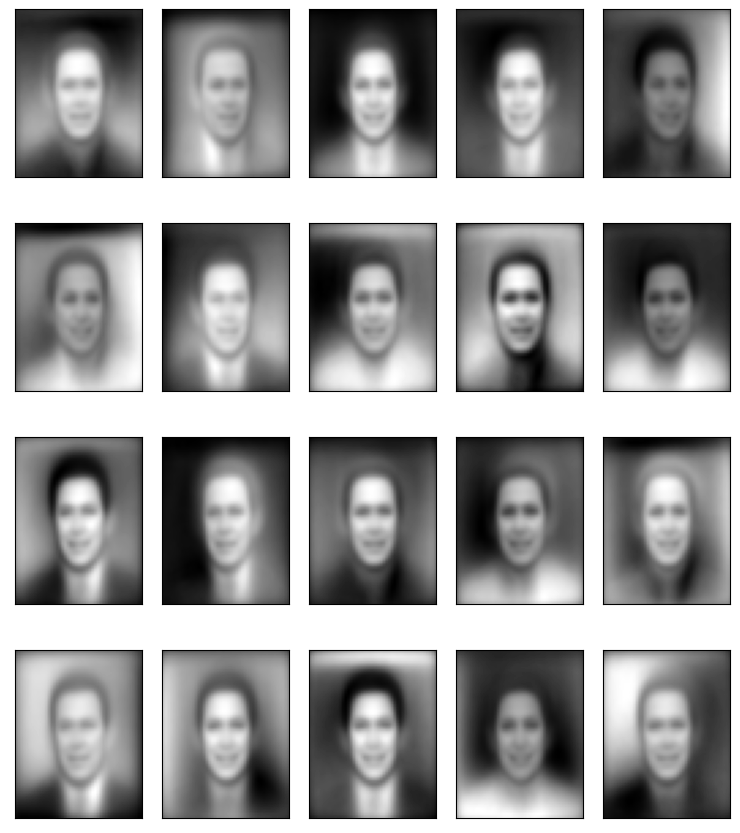

In [25]:
# projecting onto the top 10 PCDs
X_proj = X[:20, :]@V[:, :10]@V[:, :10].T
plot_faces(X_proj, n_row = 4, n_col = 5)

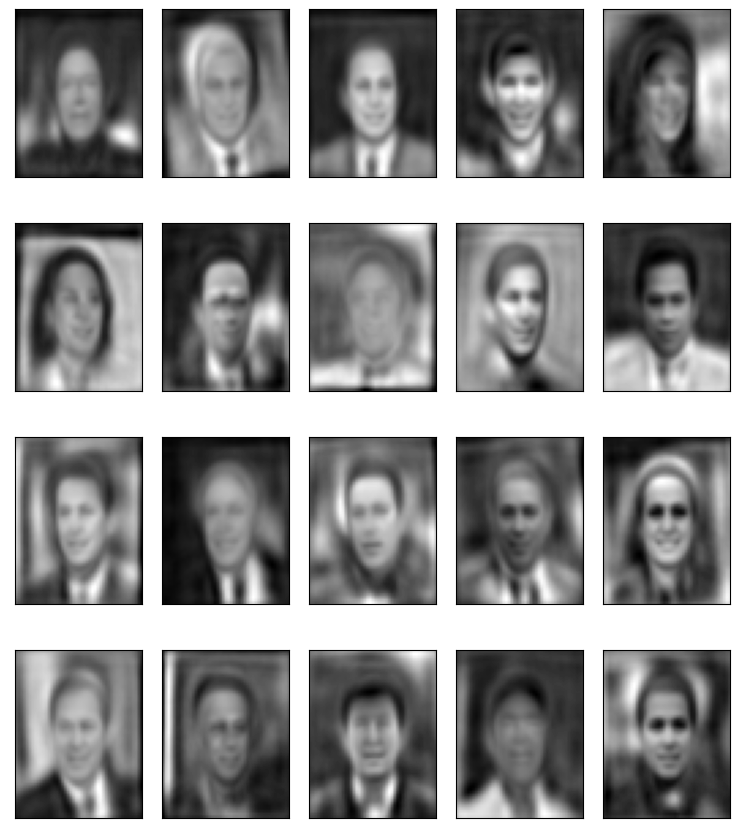

In [24]:
# projecting onto the top 100 PCDs
X_proj = X[:20, :]@V[:, :100]@V[:, :100].T
plot_faces(X_proj, n_row = 4, n_col = 5)

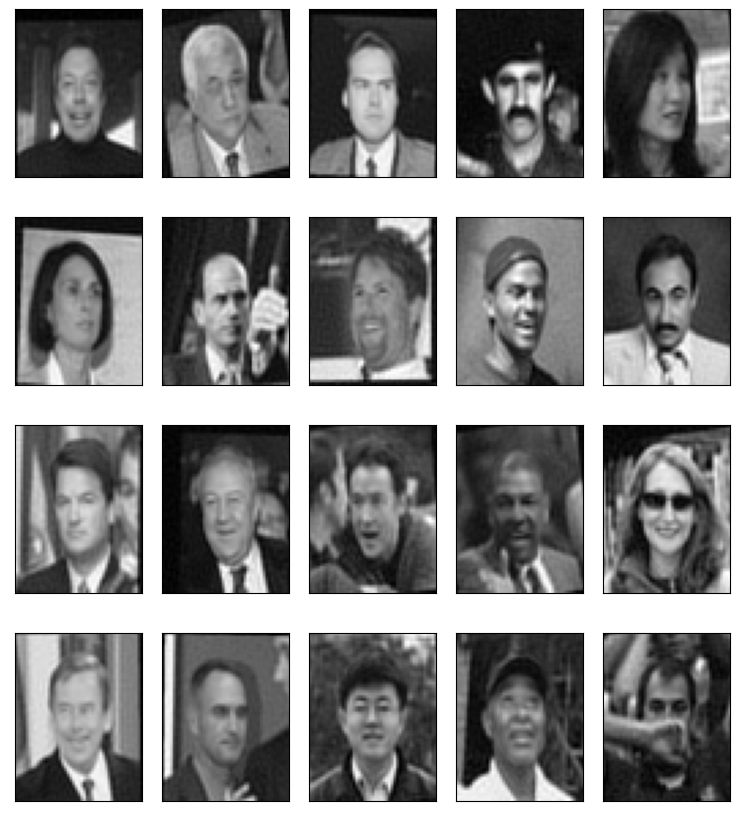

In [12]:
# projecting onto the top 1000 PCDs
X_proj = X[:20, :]@V[:, :1000]@V[:, :1000].T
plot_faces(X_proj, n_row = 4, n_col = 5)

1(d)

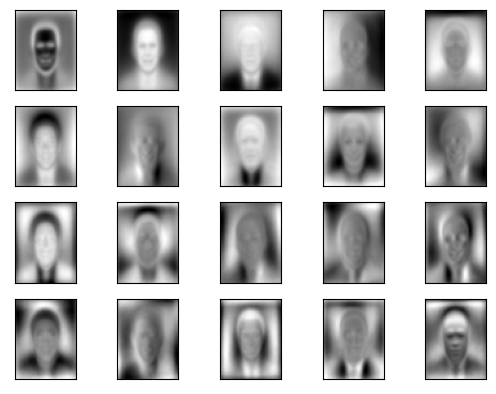

In [43]:
fig = plt.figure()
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    plt.imshow(V[:, i].reshape((62, 47)), cmap='gray')
    plt.xticks(())
    plt.yticks(())
plt.show()

1(e)

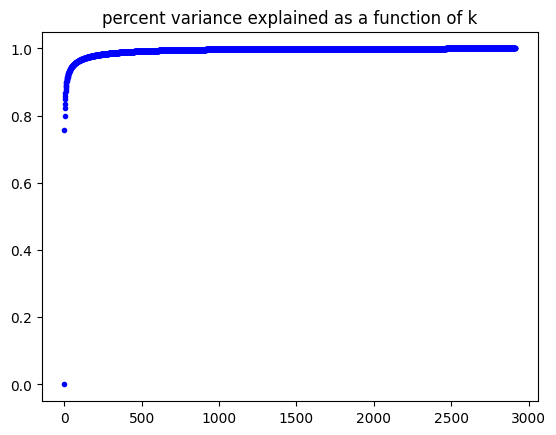

56 principal components are needed to explain 95%\ of the variance.


In [40]:
lamda = SIGMA**2
p_var = []
for i in range(n_features):
    p_var.append(np.sum(lamda[:i])/np.sum(lamda))
    if p_var[i] < 0.95:
        k = i
plt.title("percent variance explained as a function of k")
plt.plot(np.arange(n_features), p_var, "bo", markersize=3)
plt.show()
print(k, "principal components are needed to explain 95%\ of the variance.")

1(f)

# number of PCDs 10:
training loss 0.024876510724425316
test loss 0.025062479078769684

# number of PCDs 20:
training loss 0.0183276254683733
test loss 0.01842033490538597

# number of PCDs 50:
training loss 0.011458717286586761
test loss 0.011591908521950245

# number of PCDs 100:
training loss 0.0074902367778122425
test loss 0.007688120473176241

# number of PCDs 500:
training loss 0.0016753219533711672
test loss 0.001950252684764564

# number of PCDs 1000:
training loss 0.0005270905094221234
test loss 0.0007230005576275289

# number of PCDs 2914:
training loss 6.197178322809097e-14
test loss 6.17372567456552e-14



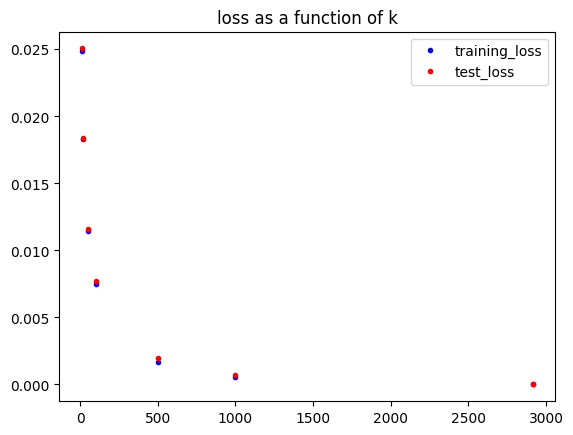

In [42]:
X_train, X_test = X[:int(0.8*n)], X[int(0.8*n):]
# SVD decomposition
U, Sigma, V = np.linalg.svd(X_train)
V = V.T

k = [10, 20, 50, 100, 500, 1000, 2914]
training_loss, test_loss = [], []
for i in range(len(k)):
    X_train_recon = X_train@V[:, :k[i]]@V[:, :k[i]].T
    training_loss.append(np.mean((X_train_recon-X_train)**2))
    X_test_recon = X_test@V[:, :k[i]]@V[:, :k[i]].T
    test_loss.append(np.mean((X_test_recon-X_test)**2))
    print(f"# number of PCDs {k[i]}:\ntraining loss {training_loss[i]}\ntest loss {test_loss[i]}\n")
    
plt.title("loss as a function of k")
plt.plot(k, training_loss, "bo", markersize=3, label='training_loss')
plt.plot(k, test_loss, "ro", markersize=3, label='test_loss')
plt.legend()
plt.show()